## API instructions to consume sentiment live feed
includes coverage, sentiment (score) and numbers of hits
<br>
keyword and topic backend engines
- **source**: Alpha Data Analytics PSA
- **frequency**: 1-hour
- **support**: tech@adalytica.io

In [9]:
from datetime import datetime
import requests, json
import pandas as pd


def auth_adalytica(username, password):
    return requests.post(f'https://adalytica.io/users/auth', 
                      data={'username':username,'password':password}).json()


def query_adalytica(token, query, engine='keyword', 
                    freq='-3h', start_date='', end_date='', rolling='true'):
    
    api_endpoint = "http://adalytica.io/sentiment/"
    
    url_request = f"{api_endpoint}{query}&engine={engine}&token={token}"\
                  f"?freq={freq}&start_date={start_date}&end_date={end_date}&rolling={rolling}"
    
    response = requests.get(url_request)
    topics_frame = pd.DataFrame(response.json()['data'])
    topics_frame.date_time = pd.DatetimeIndex(topics_frame.date_time.apply(
        lambda dt: datetime.strptime(dt, "%Y%m%d%H")))
    return topics_frame.set_index(['date_time','query','source'])


username = "user@mycompany.com"
password = "secretpass"


auth = auth_adalytica(username, password)
print(auth)
q_keyword = 'Tesla|TSLA, Ford, General&motors|GM'
q_topic = 'Tesla cars, Ford motors, General motors'

keyword_frame = query_adalytica(auth['access_token'], q_keyword, engine='keyword')
topics_frame = query_adalytica(auth['access_token'], q_topic, engine='topic')

{'access_token': '97adc55350f646a0afc5ce6f752bcd75', 'expires': '2022-02-05T02:48:16', 'token_type': 'bearer', 'user_type': 'root', 'products': ['/3cee9e28-fbef-42c0-ae64-4e40676591d7/']}


In [15]:
topics_frame.tail(20)

coverage      hits     score  \
date_time           query          source                                 
2022-02-04 22:00:00 General motors media   0.001762  4.218750  0.031970   
                    Ford motors    corp    0.000000  0.000000  0.000000   
                    General motors social  0.000847  3.868750  0.167547   
                    Tesla cars     avg     0.001941  5.728125  0.134666   
                                   media   0.002161  5.043750  0.083265   
                                   corp    0.000000  0.000000  0.000000   
                                   social  0.001721  6.412500  0.198431   
                    General motors corp    0.000000  0.000000  0.000000   
2022-02-05 01:00:00 Ford motors    media   0.002154  6.618750  0.057628   
                                   corp    0.000000  0.000000  0.000000   
                                   social  0.000793  4.656250  0.202869   
                    General motors avg     0.001302  3.993750  0.092278   
                                   media   0.001746  4.181250  0.026659   
                    Tesla cars     avg     0.002007  5.706250  0.133703   
                    General motors social  0.000835  3.800000  0.168736   
                    Tesla cars     media   0.002229  5.062500  0.080931   
                                   corp    0.000000  0.000000  0.000000   
                                   social  0.001705  6.325000  0.199698   
                    General motors corp    0.000000  0.000000  0.000000   
                    Ford motors    avg     0.001486  5.643750  0.103791   

                                           score_coverage  coverage_pie  
date_time           query          source                                
2022-02-04 22:00:00 General motors media         0.000097      0.001762  
                    Ford motors    corp          0.000000      0.000000  
                    General motors social        0.000171      0.000847  
                    Tesla cars     avg           0.000276           NaN  
                                   media         0.000175      0.002161  
                                   corp          0.000000      0.000000  
                                   social        0.000313      0.001721  
                    General motors corp          0.000000      0.000000  
2022-02-05 01:00:00 Ford motors    media         0.000115      0.002154  
                                   corp          0.000000      0.000000  
                                   social        0.000171      0.000793  
                    General motors avg           0.000136           NaN  
                                   media         0.000080      0.001746  
                    Tesla cars     avg           0.000278           NaN  
                    General motors social        0.000171      0.000835  
                    Tesla cars     media         0.000170      0.002229  
                                   corp          0.000000      0.000000  
                                   social        0.000319      0.001705  
                    General motors corp          0.000000      0.000000  
                    Ford motors    avg           0.000144           NaN

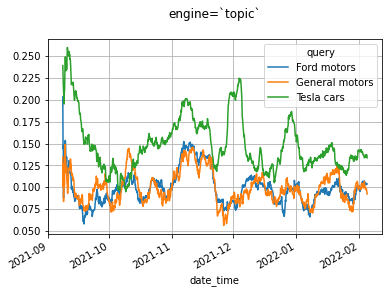

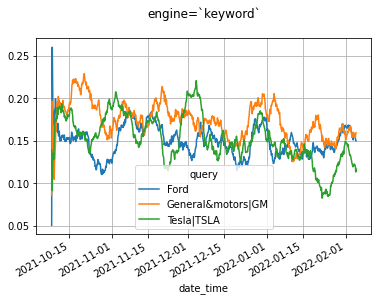

In [16]:
import matplotlib.pyplot as plt

topics_frame.xs('avg', level='source').unstack(1).score.plot(title='engine=`topic`\n')
plt.grid()

keyword_frame.xs('avg', level='source').unstack(1).score.plot(title='engine=`keyword`\n')
plt.grid()